In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('Iris.csv')

In [13]:
X = pd.DataFrame()
def generate():
    X = df.loc[:,df.columns != 'Species']
    return X
X = generate()

In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
def generate():
    y = df.iloc[:,df.columns == 'Species']
    y = pd.DataFrame(LabelEncoder().fit_transform(y))
    return y
y = generate()


In [15]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [16]:
from sklearn.preprocessing import StandardScaler
def generate():
    standardized = StandardScaler()
    standardized.fit(X)
    return standardized.transform(X)
X = generate()

In [17]:
from sklearn.model_selection import train_test_split
def generate():
    return train_test_split(X, y, test_size=0.35, random_state=1) 
X_train, X_test, y_train, y_test = generate()

In [18]:
from sklearn.svm import SVC
from sklearn import metrics
def generate():
    svc = SVC(random_state = 0) 
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    print('Accuracy Score:')
    print(metrics.accuracy_score(y_test,y_pred))
    return svc
generate()

Accuracy Score:
1.0


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
from sklearn.model_selection import cross_val_score
# create and configure model
model = SVC(gamma='scale')
def generate():
    svc = SVC(kernel='rbf',random_state = 0)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
    return scores.mean()
generate()

1.0

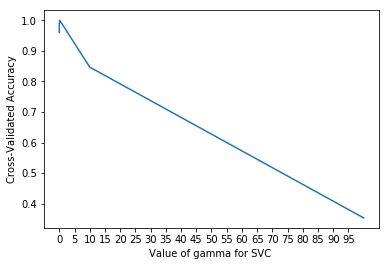

In [20]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def generate():
    for g in gamma_range:
        svc = SVC(kernel='rbf', gamma=g)
        scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(gamma_range,acc_score)
    
    plt.xlabel('Value of gamma for SVC ')
    
    plt.xticks(np.arange(0.001,100,5))
    
    plt.ylabel('Cross-Validated Accuracy')
    
    return
    
generate()

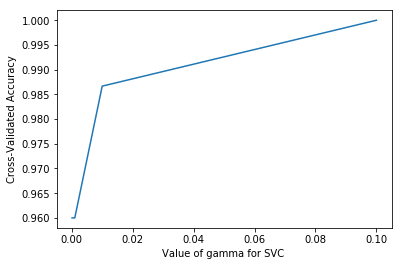

In [21]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def generate():
    for g in gamma_range:
        svc = SVC(kernel='rbf', gamma=g)
        scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(gamma_range,acc_score)
    
    plt.xlabel('Value of gamma for SVC ')
    
    #plt.xticks(np.arange(0.001,100,5))
    
    plt.ylabel('Cross-Validated Accuracy')
    return
generate()

In [22]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

from sklearn.svm import SVC
svm_model = SVC()

def generate():
    param_dist = [
                     {'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear']},
                     {'C': (np.arange(0.1,1.1,0.1)) , 'gamma': ['auto','auto_deprecated','scale'], 'kernel': ['rbf']},
                     {'degree' : [2,3,4] ,'gamma' :[0.01,0.02,0.03,0.04,0.05], 'C' :(np.arange(0.1,1,0.1)) , 'kernel':['poly']}
                 ]

    
    model_svm = GridSearchCV( svm_model,
                                    param_grid = param_dist,     
                                    n_jobs = -1,
                                    cv = 10,
                                    scoring = 'accuracy')
    model_svm.fit(X_train, y_train)
    print('Mean cross-validated score of the best_estimator is: {}'.format(model_svm.best_score_))
    y_pred= model_svm.predict(X_test)
    print('Accuracy_score is : {} '.format(metrics.accuracy_score(y_pred,y_test)))
    return model_svm
model_svm = generate()
print('Parameter setting that gave the best results:\n ',model_svm.best_params_)

Mean cross-validated score of the best_estimator is: 1.0
Accuracy_score is : 1.0 
Parameter setting that gave the best results:
  {'C': 0.2, 'kernel': 'linear'}
